# Week06 Decision Trees, Bayesian Classifer

---
p14

# 1. Decision Tree Learning with Scikit-learn

### Load Iris Dataset

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
print('Labels counts in y:', np.bincount(y_train))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test))

Labels counts in y: [35 35 35]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
X_train[:3]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3]])

In [5]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [6]:
X_test[:3]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [7]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


---
p15

### Entropy and Gini Impurity

<ipython-input-9-430d40366763>:10: RuntimeWarning: divide by zero encountered in log2
  return -p*np.log2(p) - (1-p)*np.log2((1-p))
<ipython-input-9-430d40366763>:10: RuntimeWarning: invalid value encountered in multiply
  return -p*np.log2(p) - (1-p)*np.log2((1-p))


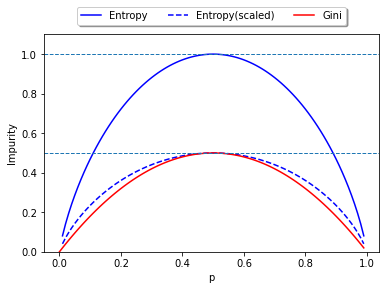

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# compute Gini
def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

# compute Entropy
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

p = np.arange(0.0, 1.0, 0.01)

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([entropy(p), entropy(p)*0.5, gini(p)], 
                          ['Entropy', 'Entropy(scaled)', 'Gini'],
                          ['-', '--', '-'],
                          ['blue', 'blue', 'red']):
    line = ax.plot(p, i, label=lab, linestyle=ls, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=True)
ax.axhline(y=0.5, linewidth=1, linestyle='--')
ax.axhline(y=1.0, linewidth=1, linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p')
plt.ylabel('Impurity')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

---
p16

### Learning Decision Tree 

In [10]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree with training dataset
tree = DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

---
p17

### Model evaluation

In [11]:
X_test[10:15]

array([[1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2]])

In [12]:
y_test[10:15]

array([0, 2, 0, 1, 0])

In [13]:
# predict class of X_test[10] ~ X_test[14]
tree.predict(X_test[10:15])

array([0, 2, 0, 1, 0])

In [14]:
# Compute train accuracy
acc = tree.score(X_train,y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9904761904761905


In [15]:
# Compute test accuracy
acc = tree.score(X_test,y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9777777777777777


---
p18

### Visualizing the model

[Text(139.5, 504.7714285714286, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(69.75, 427.11428571428576, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(209.25, 427.11428571428576, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(139.5, 349.4571428571429, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(279.0, 349.4571428571429, 'X[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(139.5, 271.8, 'X[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(69.75, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(209.25, 194.14285714285717, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(139.5, 116.48571428571432, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(279.0, 116.48571428571432, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(209.25, 38.82857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(348.75, 38.82857142857

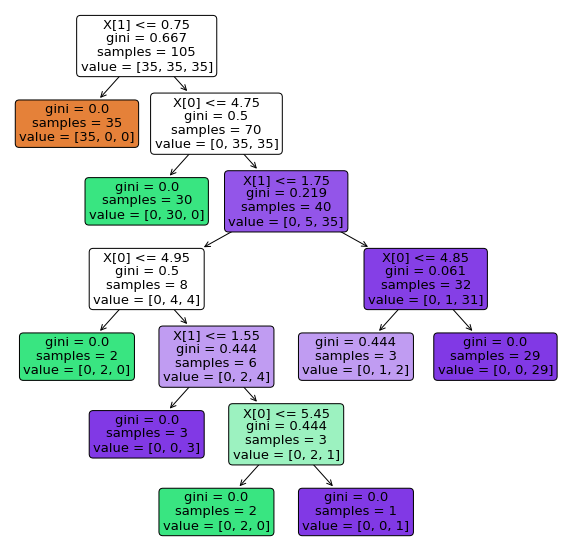

In [16]:
from sklearn.tree import plot_tree #scikit-learn >= 22.0

# plot the tree
plt.figure(figsize=(10,10))
plot_tree(tree,filled=True, rounded=True)

---
p19

### Plotting the decision boundary

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

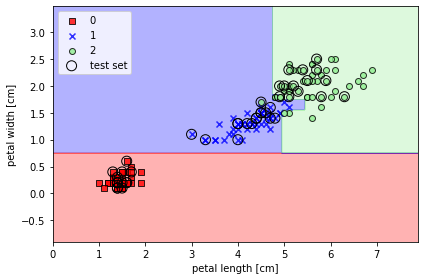

In [18]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p20

### Building Decision Tree with max depth

In [19]:
from sklearn.tree import DecisionTreeClassifier

# learn decision tree of depth 2
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

---
p21

### Model evaluation

In [20]:
# Compute train accuracy
acc = tree.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9523809523809523


In [21]:
# Compute test accuracy
acc = tree.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9555555555555556


### Visualizing the model

[Text(133.92000000000002, 181.2, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.219\nsamples = 40\nvalue = [0, 5, 35]')]

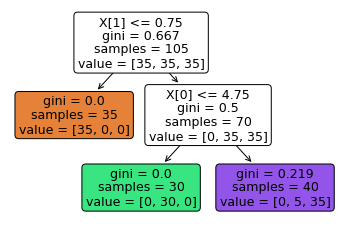

In [22]:
from sklearn.tree import plot_tree

# plot the tree
plot_tree(tree, filled=True, rounded=True)

---
p22

### Plotting the decision boundary

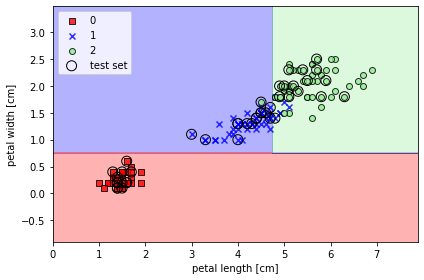

In [23]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# learn decision tree of depth 2
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, max_features='sqrt',random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=1)

### Model evaluation

In [25]:
# Compute train accuracy
acc = forest.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9523809523809523


In [26]:
# Compute test accuracy
acc = forest.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9777777777777777


### Plotting the decision boundary

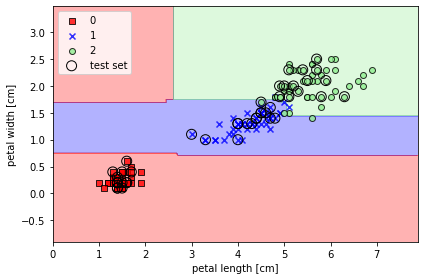

In [27]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p26

# 2. Naïve Bayesian Classifier Using Scikit-learn
### Load Iris Dataset

In [28]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# use features 2 and 3 only
X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)


In [30]:
X_train[:3]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3]])

In [31]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [32]:
X_test[:3]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [33]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [34]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


---
p27-28

### Learning Gaussian Naïve Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [36]:
# class probability p(Ck)
gnb.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [37]:
# mean of each feature per class for p(x|Ck)
gnb.theta_

array([[1.45714286, 0.24285714],
       [4.27428571, 1.32285714],
       [5.63714286, 2.02571429]])

In [38]:
# variance of each feature per class for p(x|Ck)
gnb.sigma_

array([[0.03730613, 0.00759184],
       [0.20419592, 0.04176327],
       [0.3143347 , 0.08305306]])

### Model evaluation

In [39]:
X_test[10:15]

array([[1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2]])

In [40]:
y_test[10:15]

array([0, 2, 0, 1, 0])

In [41]:
# predict class of X_test[10] ~ X_test[14]
gnb.predict(X_test[10:15])

array([0, 2, 0, 1, 0])

In [42]:
# predict class probabilty of X_test[10] ~ X_test[14]
gnb.predict_proba(X_test[10:15])

array([[1.00000000e+000, 2.31526477e-013, 1.00135144e-019],
       [1.22001111e-137, 1.24130788e-001, 8.75869212e-001],
       [1.00000000e+000, 9.79774424e-017, 9.37180646e-023],
       [1.33678957e-034, 9.99993914e-001, 6.08569557e-006],
       [1.00000000e+000, 9.79774424e-017, 9.37180646e-023]])

In [43]:
# Compute train accuracy
acc = gnb.score(X_train,y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9523809523809523


In [44]:
# Compute test accuracy
acc = gnb.score(X_test,y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9777777777777777


---
p29

### Plotting the decision boundary

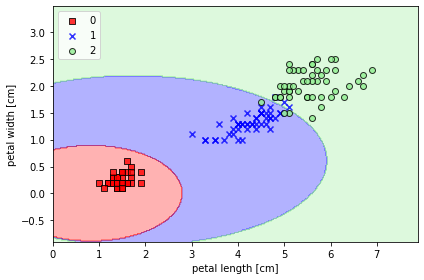

In [45]:
from sklearn.naive_bayes import GaussianNB

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                    classifier=gnb)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
p30

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week06_givencode.ipynb) to e-class.
- **Deadline : Saturday 11:59pm**
- Modify your ipynb file name as **“Week06_StudentNum_Name.ipynb”**
  - ```Ex) Week06_2020123456_홍길동.ipynb``` 

---
p31

# Quiz 1 : Decision Tree 

## Learn decision tree model for Heart Diseases classification using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use all 297 samples, all 13 features
- Label : The feature 'num' refers to the presence of heart disease in the patient(from 0 to 4). We will convert values 2, 3, 4 to 1(to do binary classification)
- Use 70% of dataset for training, 30% for testing
- Find the smallest tree among the trees that show highest test accuracy
- Visualize the tree, and compute the accuracies
- Predict the class of following data
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]

### Loading Heart Disease Dataset

In [46]:
import pandas as pd
import numpy as np

In [47]:
hd = pd.read_csv('heart_disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [48]:
hd.shape

(297, 14)

In [49]:
hd['num'] = np.where(hd['num'] > 0, 1, 0)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [50]:
# Make X, y using all features
X = hd.iloc[:,:-1]
y = hd[['num']]
print('Class labels:', np.unique(y))

Class labels: [0 1]


### Splitting data 

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### Learning Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Visualizing the model

[Text(279.0, 475.65000000000003, 'X[12] <= 4.5\ngini = 0.497\nsamples = 207\nvalue = [112, 95]'),
 Text(139.5, 339.75, 'X[2] <= 3.5\ngini = 0.326\nsamples = 117\nvalue = [93, 24]'),
 Text(69.75, 203.85000000000002, 'X[9] <= 3.1\ngini = 0.178\nsamples = 81\nvalue = [73, 8]'),
 Text(34.875, 67.94999999999999, 'gini = 0.16\nsamples = 80\nvalue = [73, 7]'),
 Text(104.625, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(209.25, 203.85000000000002, 'X[11] <= 0.5\ngini = 0.494\nsamples = 36\nvalue = [20, 16]'),
 Text(174.375, 67.94999999999999, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(244.125, 67.94999999999999, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(418.5, 339.75, 'X[9] <= 0.45\ngini = 0.333\nsamples = 90\nvalue = [19, 71]'),
 Text(348.75, 203.85000000000002, 'X[7] <= 140.5\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(313.875, 67.94999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(383.625, 67.94999999999999, 'gini = 0.49

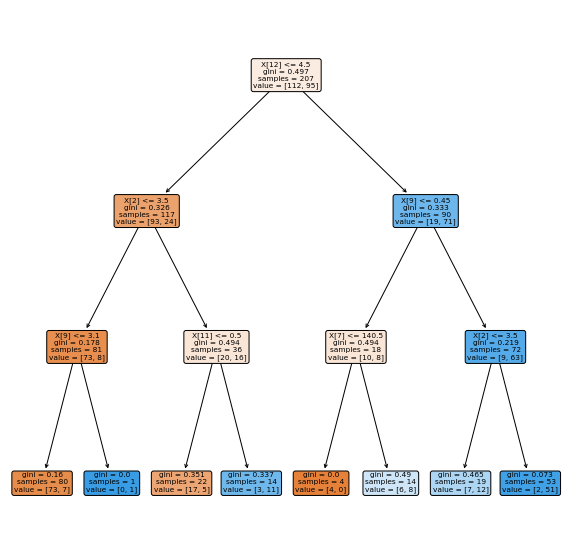

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True, rounded=True)

### Model evaluation

In [54]:
# Compute train accuracy
acc = tree.score(X_train,y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.855072463768116


In [55]:
# Compute test accuracy
acc = tree.score(X_test,y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.7444444444444445


### Classification of new data

In [56]:
# predict class 
tree.predict([[52,2,5,135,250,0,3,180,1,0,1,0,2]])

array([0])

---
p32

# Quiz 2 : Random Forest

## Learn Random Forest model for Heart Diseases classification using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use all 297 samples, all 13 features
- Label : The feature 'num' refers to the presence of heart disease in the patient(from 0 to 4). We will convert values 2, 3, 4 to 1(to do binary classification)
- Use 70% of dataset for training, 30% for testing
- Find the forest that shows highest test accuracy
- Visualize the tree, and compute the accuracies
- Predict the class of following data
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]

### Loading Heart Disease Dataset

In [57]:
import pandas as pd
import numpy as np

In [58]:
hd = pd.read_csv('heart_disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [59]:
hd.shape

(297, 14)

In [60]:
hd['num'] = np.where(hd['num'] > 0, 1, 0)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [61]:
# Make X, y using all features
X = hd.iloc[:,:-1]
y = hd[['num']]
print('Class labels:', np.unique(y))

Class labels: [0 1]


### Splitting data 

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### Learning Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',max_depth=3,random_state=1)
forest.fit(X_train,y_train)

<ipython-input-63-bbc2160c5479>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, random_state=1)

### Model evaluation

In [64]:
# Compute train accuracy
acc = forest.score(X_train,y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.8695652173913043


In [65]:
# Compute test accuracy
acc = forest.score(X_test,y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.8555555555555555


### Classification of new data

In [66]:
# predict class 
forest.predict([[52,2,5,135,250,0,3,180,1,0,1,0,2]])

array([0])

---
p32

# Quiz 3 : Naïve Bayesian Classifier
## Learn Naïve Bayesian Classifier using heart_disease.csv dataset
- **Dataset information** : https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Use the same training and test dataset of Quiz 1
- Compute the accuracies of the classifier
- Predict the class of following data with probability
            [[52, 2, 5, 135, 250, 0, 3, 180, 1, 0, 1, 0, 2]]

### Learning Gaussian Naïve Bayes Classifier

In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [68]:
# class probability p(Ck)
gnb.class_prior_

array([0.5410628, 0.4589372])

In [69]:
# mean of each feature per class for p(x|Ck)
gnb.theta_

array([[5.32946429e+01, 5.17857143e-01, 2.79464286e+00, 1.29571429e+02,
        2.48205357e+02, 1.51785714e-01, 9.46428571e-01, 1.56901786e+02,
        1.51785714e-01, 6.65178571e-01, 1.40178571e+00, 3.12500000e-01,
        3.63392857e+00],
       [5.61578947e+01, 8.31578947e-01, 3.64210526e+00, 1.32421053e+02,
        2.52263158e+02, 1.26315789e-01, 1.22105263e+00, 1.39000000e+02,
        5.78947368e-01, 1.63578947e+00, 1.81052632e+00, 1.04210526e+00,
        5.90526316e+00]])

In [70]:
# variance of each feature per class for p(x|Ck)
gnb.sigma_

array([[8.70471173e+01, 2.49684259e-01, 8.59617294e-01, 2.61584187e+02,
        3.41643105e+03, 1.28749948e-01, 9.97133238e-01, 3.33267143e+02,
        1.28749948e-01, 6.53879890e-01, 3.47499948e-01, 4.82704029e-01,
        1.99992342e+00],
       [6.31013882e+01, 1.40058538e-01, 5.87703967e-01, 3.53296402e+02,
        2.79709917e+03, 1.10363247e-01, 9.30086239e-01, 5.24589477e+02,
        2.43770449e-01, 1.82356436e+00, 3.64102859e-01, 9.87703967e-01,
        2.92787017e+00]])

### Model evaluation

In [71]:
# Compute train accuracy
acc = gnb.score(X_train,y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.8405797101449275


In [72]:
# Compute test accuracy
acc = gnb.score(X_test,y_test)
print("Train Accuracy : ", acc)

Train Accuracy :  0.8555555555555555


### Classification of new data

In [73]:
# predict class 
gnb.predict([[52,2,5,135,250,0,3,180,1,0,1,0,2]])

array([0])

In [74]:
# predict class probabilty 
gnb.predict_proba([[52,2,5,135,250,0,3,180,1,0,1,0,2]])

array([[0.85577649, 0.14422351]])